In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
file = "Kabupaten fak fak.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,1/1/2010 0:00,24,31,26,88,0.6,0,7,360,3,N
1,2/2/2025 0:00,23,31,26.9,88,2.7,0.8,6,180,4,SW
2,1/3/2010 0:00,24,31,26.6,89,8.5,0.5,5,360,2,S
3,1/4/2010 0:00,24,31.4,27.1,85,0.5,0.6,7,180,4,N
4,1/5/2010 0:00,24,30.6,25.5,93,4.2,0.3,5,360,3,N


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  5479 non-null   object
 1   TN       5479 non-null   object
 2   TX       5478 non-null   object
 3   TAVG     5479 non-null   object
 4   RH_AVG   5478 non-null   object
 5   RR       5479 non-null   object
 6   SS       5479 non-null   object
 7   FF_X     5479 non-null   object
 8   DDD_X    5479 non-null   object
 9   FF_AVG   5479 non-null   object
 10  DDD_CAR  5479 non-null   object
dtypes: object(11)
memory usage: 471.0+ KB


Mengecek data duplikat
Membersihkan data

In [5]:
duplicated = df.duplicated().sum()
print("There are %d duplicated records" % (duplicated))

There are 0 duplicated records


menangani missing values dan nilai yang tidak sesuai


In [6]:
missing = df.isnull().sum() 
print("There are %d null records" % (missing.sum()))

dash_missing = (df == "-").sum().sum() 
print("There are %d '-' records" % dash_missing)

eightfour_missing = (df == "-").sum().sum() 
print("There are %d '8888' records" % eightfour_missing)

ninefour_missing = (df == "-").sum().sum() 
print("There are %d '9999' records" % ninefour_missing)

There are 2 null records
There are 7804 '-' records
There are 7804 '8888' records
There are 7804 '9999' records


In [7]:
missing_locs = df.isnull()

# Melihat posisi yang bernilai True (kosong)
print(missing_locs[missing_locs == True].stack()) 

2623  TX        True
      RH_AVG    True
dtype: object


In [8]:
(df == "-").sum().sum()

np.int64(7804)

In [9]:
(df == "8888").sum().sum()

np.int64(376)

In [10]:
df[(df == "-").any(axis=1)]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
14,1/15/2010 0:00,19,31,25.9,87,33.3,0.4,-,360,5,N
28,1/29/2010 0:00,24,31.6,26.8,90,0.4,0.4,7,270,3,-
56,2/26/2010 0:00,23,32.8,27.7,77,0,0.5,-,360,7,N
90,4/1/2010 0:00,-,-,-,-,-,-,-,-,-,-
91,4/2/2010 0:00,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
5294,6/30/2024 0:00,23,29.4,26.2,88,-,8.8,2,180,1,NE
5295,7/1/2024 0:00,23.8,29.4,25.9,90,-,1.3,4,120,1,NE
5296,7/2/2024 0:00,23,28.9,26.2,86,-,0.9,3,20,1,N
5297,7/3/2024 0:00,23,30.2,25.9,91,-,2.5,4,190,2,N


In [11]:
df[(df == "8888").any(axis=1)]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
323,11/20/2010 0:00,24,29.8,26.7,85,8888,0.4,6,180,3,N
806,3/17/2012 0:00,24,29.4,25.7,88,8888,0.2,4,20,3,S
945,8/3/2012 0:00,22,28.4,25.1,90,8888,0.4,-,-,-,-
946,8/4/2012 0:00,23,27.6,24.4,93,8888,0.1,-,-,-,-
950,8/8/2012 0:00,21,25.8,24.3,91,8888,0,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
5438,11/21/2024 0:00,24.2,31.2,25.7,95,8888,4.4,3,160,1,C
5446,11/29/2024 0:00,24.9,32.9,28,85,8888,8,4,360,1,C
5447,11/30/2024 0:00,24.7,32.1,28.7,82,8888,7.4,3,260,1,C
5450,12/3/2024 0:00,24.7,32,28.7,82,8888,7.5,4,240,2,SW


In [12]:
df[(df == "9999").any(axis=1)]

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR


In [13]:
df.replace("-", np.nan, inplace=True)
df.replace("8888", np.nan, inplace=True)
df.replace("9999", np.nan, inplace=True)

In [14]:
df.fillna(method='bfill', inplace=True)

C:\Users\melvi\AppData\Local\Temp\ipykernel_21156\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [15]:
# mengecek ulang keberadan nilai kosong
print("Sisa data kosong setelah bfill:")
print(df.isnull().sum())

Sisa data kosong setelah bfill:
TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64


In [16]:
missing = df.isnull().sum() 
print("There are %d null records" % (missing.sum()))

dash_missing = (df == "-").sum().sum() 
print("There are %d '-' records" % dash_missing)

eightfour_missing = (df == "-").sum().sum() 
print("There are %d '8888' records" % eightfour_missing)

ninefour_missing = (df == "-").sum().sum() 
print("There are %d '9999' records" % ninefour_missing)

There are 0 null records
There are 0 '-' records
There are 0 '8888' records
There are 0 '9999' records


In [17]:
df.to_csv("Kabupaten fak fak new.csv", index=False)

Target Penelitian menilai apakah data yang dimiliki memiliki parameter cuaca ekstrem untuk kelautan dan pertanian selama periode tahun 2010–2024.

Parameter Cuaca Ektrem :

suhu maksimum > rata-rata suhu per bulan  tx

curah hujan <50 mm/hari rr

80% < kelembapan > 90%  RH_AVG

angin kencang  > 10 m/s FF_X_x

jika terbukti adanya parameter cuaca ekstrem untuk kelautan dan pertanian selama periode tersebut sebanyak 60 % maka dapat disimpulkan bahwa cuaca ekstrem pada parameter terjadi pada daerah tersebut.

In [18]:
# Baca df
df= pd.read_csv("Kabupaten fak fak new.csv")


In [19]:
#Mencetak 5 baris pertama
df.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,1/1/2010 0:00,24,31.0,26.0,88,0.6,0.0,7,360,3,N
1,2/2/2025 0:00,23,31.0,26.9,88,2.7,0.8,6,180,4,SW
2,1/3/2010 0:00,24,31.0,26.6,89,8.5,0.5,5,360,2,S
3,1/4/2010 0:00,24,31.4,27.1,85,0.5,0.6,7,180,4,N
4,1/5/2010 0:00,24,30.6,25.5,93,4.2,0.3,5,360,3,N


In [20]:
# penganti format angka bulan menjadi huruf
bulan_labels = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", 
                "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]

analisis rata rata suhu maksimum Bulanan periode 2014-2024

In [21]:
#  Persiapkan data
df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
df["TX"] = pd.to_numeric(df["TX"], errors="coerce")
df_filtered = df[(df["TANGGAL"].dt.year >= 2010) & (df["TANGGAL"].dt.year <= 2024)].copy()
df_filtered["TAHUN"] = df_filtered["TANGGAL"].dt.year
df_filtered["BULAN"] = df_filtered["TANGGAL"].dt.month

In [22]:
#  Group rata-rata TX per bulan dan tahun
monthly_tx_by_year = df_filtered.groupby(["TAHUN", "BULAN"])["TX"].mean().unstack(level=1)

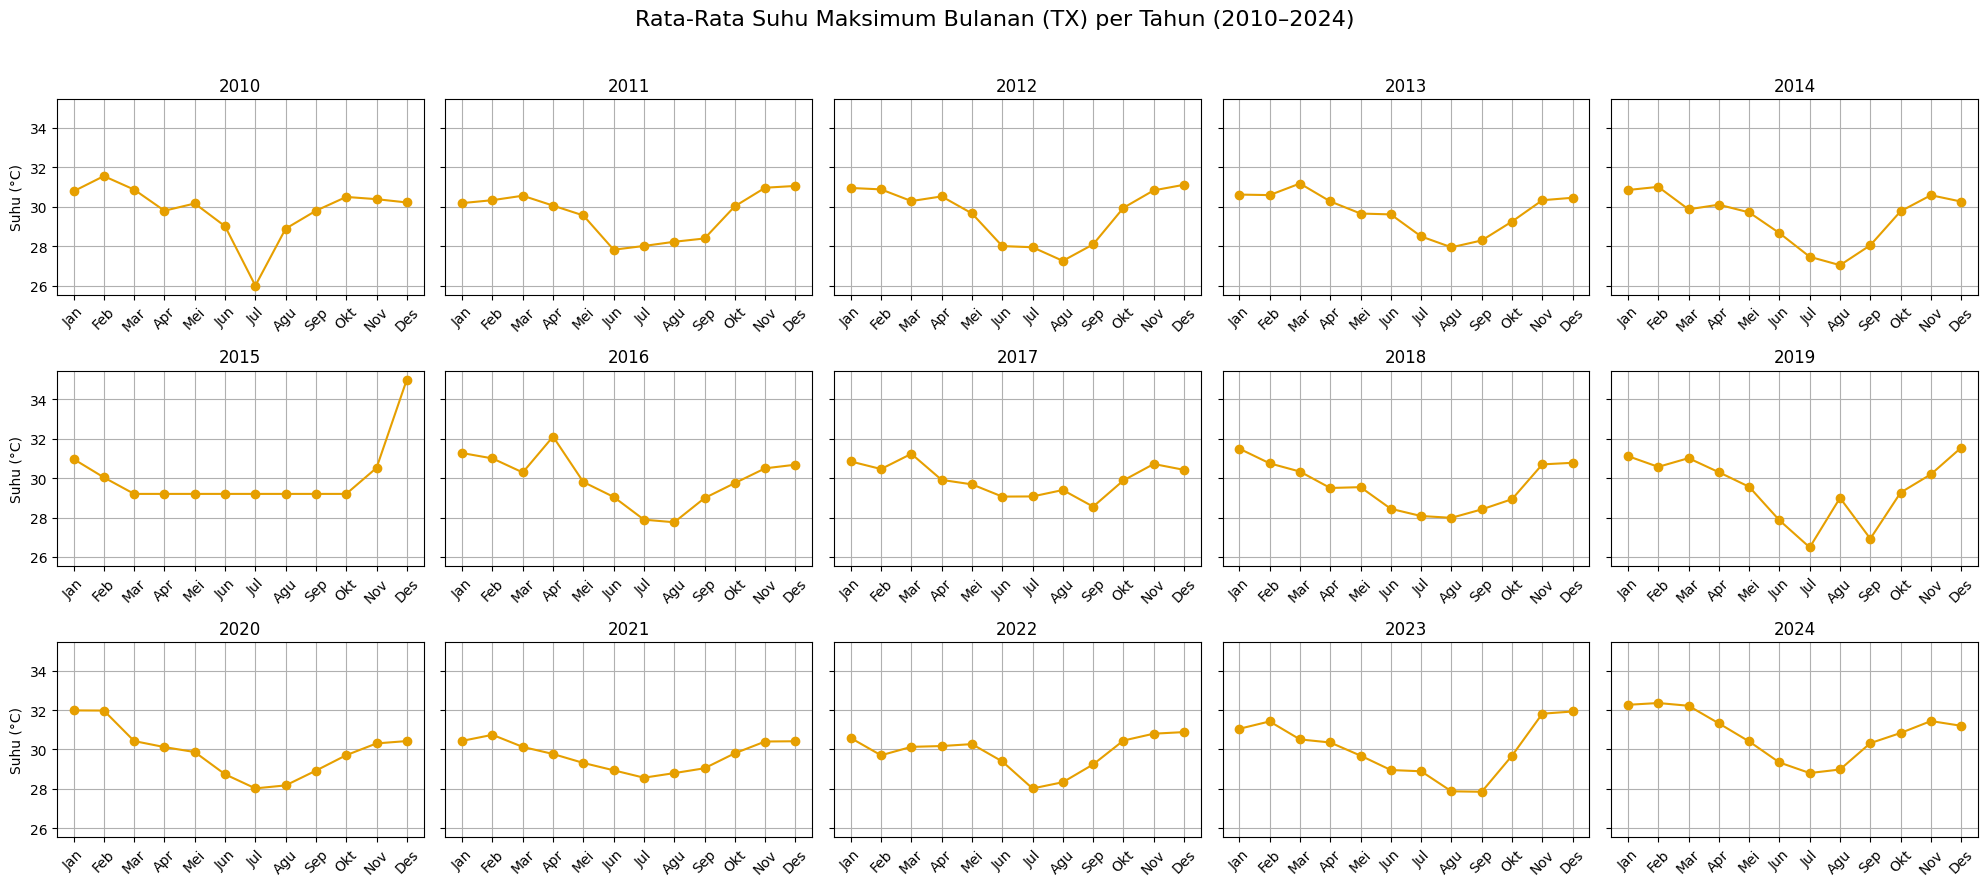

Tabel Rata-Rata Suhu Maksimum (TX) per Bulan dan Tahun:


TAHUN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
BULAN,,,,,,,,,,,,,,,
1,30.786667,30.187097,30.954839,30.619355,30.851613,30.967742,31.270968,30.845161,31.493548,31.116129,31.980645,30.435484,30.580645,31.048387,32.264516
2,31.557143,30.335714,30.882759,30.592857,31.010714,30.035714,31.000000,30.460714,30.750000,30.571429,31.972414,30.742857,29.703571,31.421429,32.355172
3,30.870968,30.561290,30.290323,31.180645,29.870968,29.200000,30.287097,31.232258,30.332258,31.012903,30.425806,30.129032,30.132258,30.509677,32.216129
4,29.800000,30.060000,30.526667,30.273333,30.106667,29.200000,32.106667,29.910000,29.500000,30.300000,30.120000,29.770000,30.173333,30.353333,31.323333
5,30.167742,29.561290,29.664516,29.658065,29.716129,29.200000,29.803226,29.683871,29.541935,29.561290,29.867742,29.316129,30.270968,29.687097,30.406452
6,29.013333,27.823333,28.006667,29.613333,28.666667,29.200000,29.046667,29.063333,28.443333,27.860000,28.740000,28.943333,29.393333,28.956667,29.340000
7,26.000000,28.012903,27.948387,28.496774,27.464516,29.200000,27.893548,29.070968,28.077419,26.487097,28.025806,28.567742,28.022581,28.893548,28.803226
8,28.890323,28.225806,27.258065,27.945161,27.038710,29.200000,27.761290,29.396774,27.987097,28.996774,28.177419,28.800000,28.338710,27.877419,28.983871
9,29.800000,28.393333,28.093333,28.293333,28.050000,29.200000,28.986667,28.553333,28.413333,26.926667,28.926667,29.046667,29.240000,27.853333,30.320000


In [23]:
#  Plot semua tahun sebagai subplot
tahun_list = monthly_tx_by_year.index.tolist()
n_tahun = len(tahun_list)
n_cols = 5
n_rows = -(-n_tahun // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=True)

for i, tahun in enumerate(tahun_list):
    r, c = divmod(i, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.plot(range(1, 13), monthly_tx_by_year.loc[tahun], marker='o', color="#E69F00")
    ax.set_title(str(tahun))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(bulan_labels, rotation=45)
    ax.grid(True)
    if c == 0:
        ax.set_ylabel("Suhu (°C)")

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

fig.suptitle("Rata-Rata Suhu Maksimum Bulanan (TX) per Tahun (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Simpan hasil ke CSV
os.makedirs("laporan", exist_ok=True)
monthly_tx_by_year.T.to_csv("laporan/tx_per_bulan_per_tahun_2010_2024.csv", index_label="TAHUN")

#  Tampilkan sebagai tabel
print("Tabel Rata-Rata Suhu Maksimum (TX) per Bulan dan Tahun:")
display(monthly_tx_by_year.T)

analisis rata rata suhu minimum Bulanan periode 2014-2024

In [24]:
#  Persiapkan data
df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
df["TN"] = pd.to_numeric(df["TN"], errors="coerce")
df_filtered = df[(df["TANGGAL"].dt.year >= 2010) & (df["TANGGAL"].dt.year <= 2024)].copy()
df_filtered["TAHUN"] = df_filtered["TANGGAL"].dt.year
df_filtered["BULAN"] = df_filtered["TANGGAL"].dt.month

In [25]:
#  Group rata-rata TN per bulan dan tahun
monthly_TN_by_year = df_filtered.groupby(["TAHUN", "BULAN"])["TN"].mean().unstack(level=1)

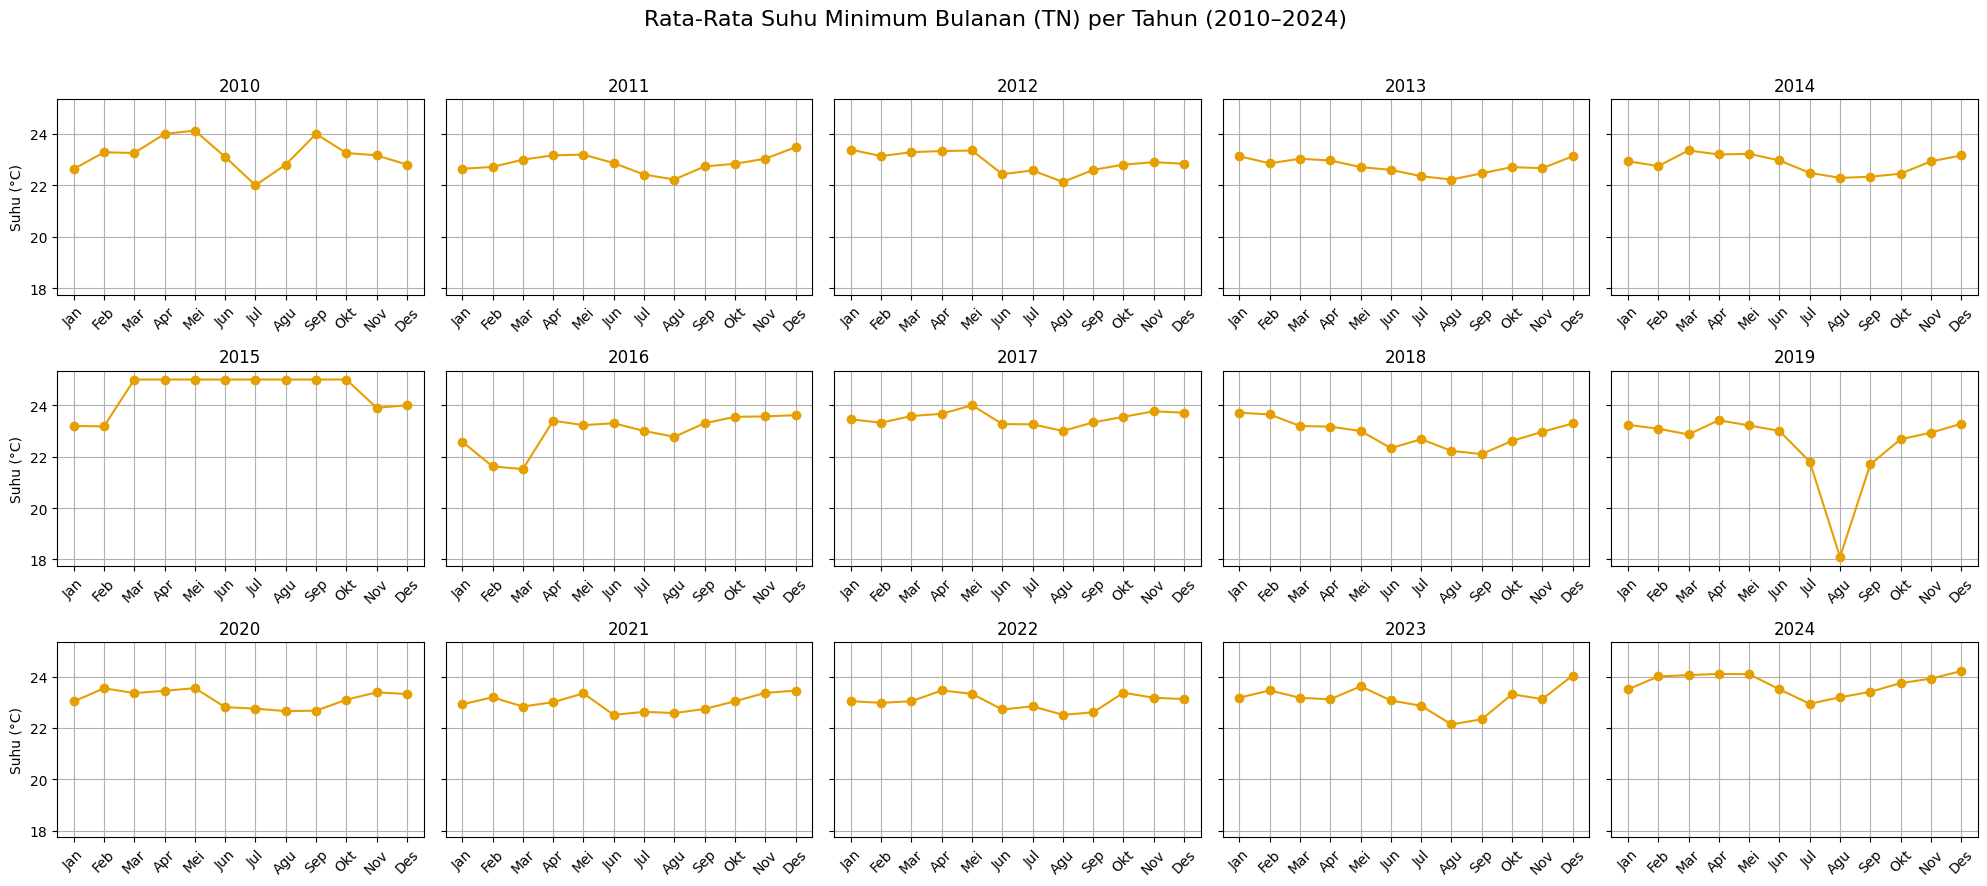

Tabel Rata-Rata Suhu Maksimum (TN) per Bulan dan Tahun:


TAHUN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
BULAN,,,,,,,,,,,,,,,
1,22.633333,22.645161,23.387097,23.129032,22.935484,23.193548,22.580645,23.451613,23.709677,23.238710,23.032258,22.922581,23.041935,23.180645,23.503226
2,23.285714,22.714286,23.137931,22.857143,22.750000,23.178571,21.620690,23.321429,23.642857,23.085714,23.544828,23.192857,22.978571,23.460714,24.003448
3,23.258065,23.000000,23.290323,23.032258,23.354839,25.000000,21.516129,23.580645,23.193548,22.864516,23.358065,22.835484,23.041935,23.174194,24.058065
4,24.000000,23.166667,23.333333,22.966667,23.200000,25.000000,23.400000,23.666667,23.166667,23.416667,23.446667,23.003333,23.460000,23.116667,24.103333
5,24.129032,23.193548,23.354839,22.709677,23.225806,25.000000,23.225806,24.000000,23.000000,23.212903,23.551613,23.348387,23.329032,23.622581,24.093548
6,23.103448,22.866667,22.433333,22.600000,22.966667,25.000000,23.300000,23.266667,22.333333,23.000000,22.810000,22.510000,22.720000,23.070000,23.503333
7,22.000000,22.419355,22.580645,22.354839,22.483871,25.000000,23.000000,23.258065,22.677419,21.806452,22.754839,22.629032,22.841935,22.864516,22.941935
8,22.806452,22.225806,22.129032,22.225806,22.290323,25.000000,22.774194,23.000000,22.225806,18.096774,22.654839,22.580645,22.512903,22.138710,23.193548
9,24.000000,22.733333,22.600000,22.466667,22.333333,25.000000,23.300000,23.333333,22.100000,21.700000,22.673333,22.740000,22.610000,22.340000,23.406667


In [26]:
#  Plot semua tahun sebagai subplot
tahun_list = monthly_TN_by_year.index.tolist()
n_tahun = len(tahun_list)
n_cols = 5
n_rows = -(-n_tahun // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=True)

for i, tahun in enumerate(tahun_list):
    r, c = divmod(i, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.plot(range(1, 13), monthly_TN_by_year.loc[tahun], marker='o', color="#E69F00")
    ax.set_title(str(tahun))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(bulan_labels, rotation=45)
    ax.grid(True)
    if c == 0:
        ax.set_ylabel("Suhu (°C)")

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

fig.suptitle("Rata-Rata Suhu Minimum Bulanan (TN) per Tahun (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Simpan hasil ke CSV
os.makedirs("laporan", exist_ok=True)
monthly_TN_by_year.T.to_csv("laporan/TN_per_bulan_per_tahun_2010_2024.csv", index_label="TAHUN")

#  Tampilkan sebagai tabel
print("Tabel Rata-Rata Suhu Maksimum (TN) per Bulan dan Tahun:")
display(monthly_TN_by_year.T)

analisis suhu rata-rata harian Bulanan periode 2014-2024

In [27]:
#  Persiapkan data
df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
df["TAVG"] = pd.to_numeric(df["TAVG"], errors="coerce")
df_filtered = df[(df["TANGGAL"].dt.year >= 2010) & (df["TANGGAL"].dt.year <= 2024)].copy()
df_filtered["TAHUN"] = df_filtered["TANGGAL"].dt.year
df_filtered["BULAN"] = df_filtered["TANGGAL"].dt.month

In [28]:
#  Group rata-rata TAVG per bulan dan tahun
monthly_tavg_by_year = df_filtered.groupby(["TAHUN", "BULAN"])["TAVG"].mean().unstack(level=1)


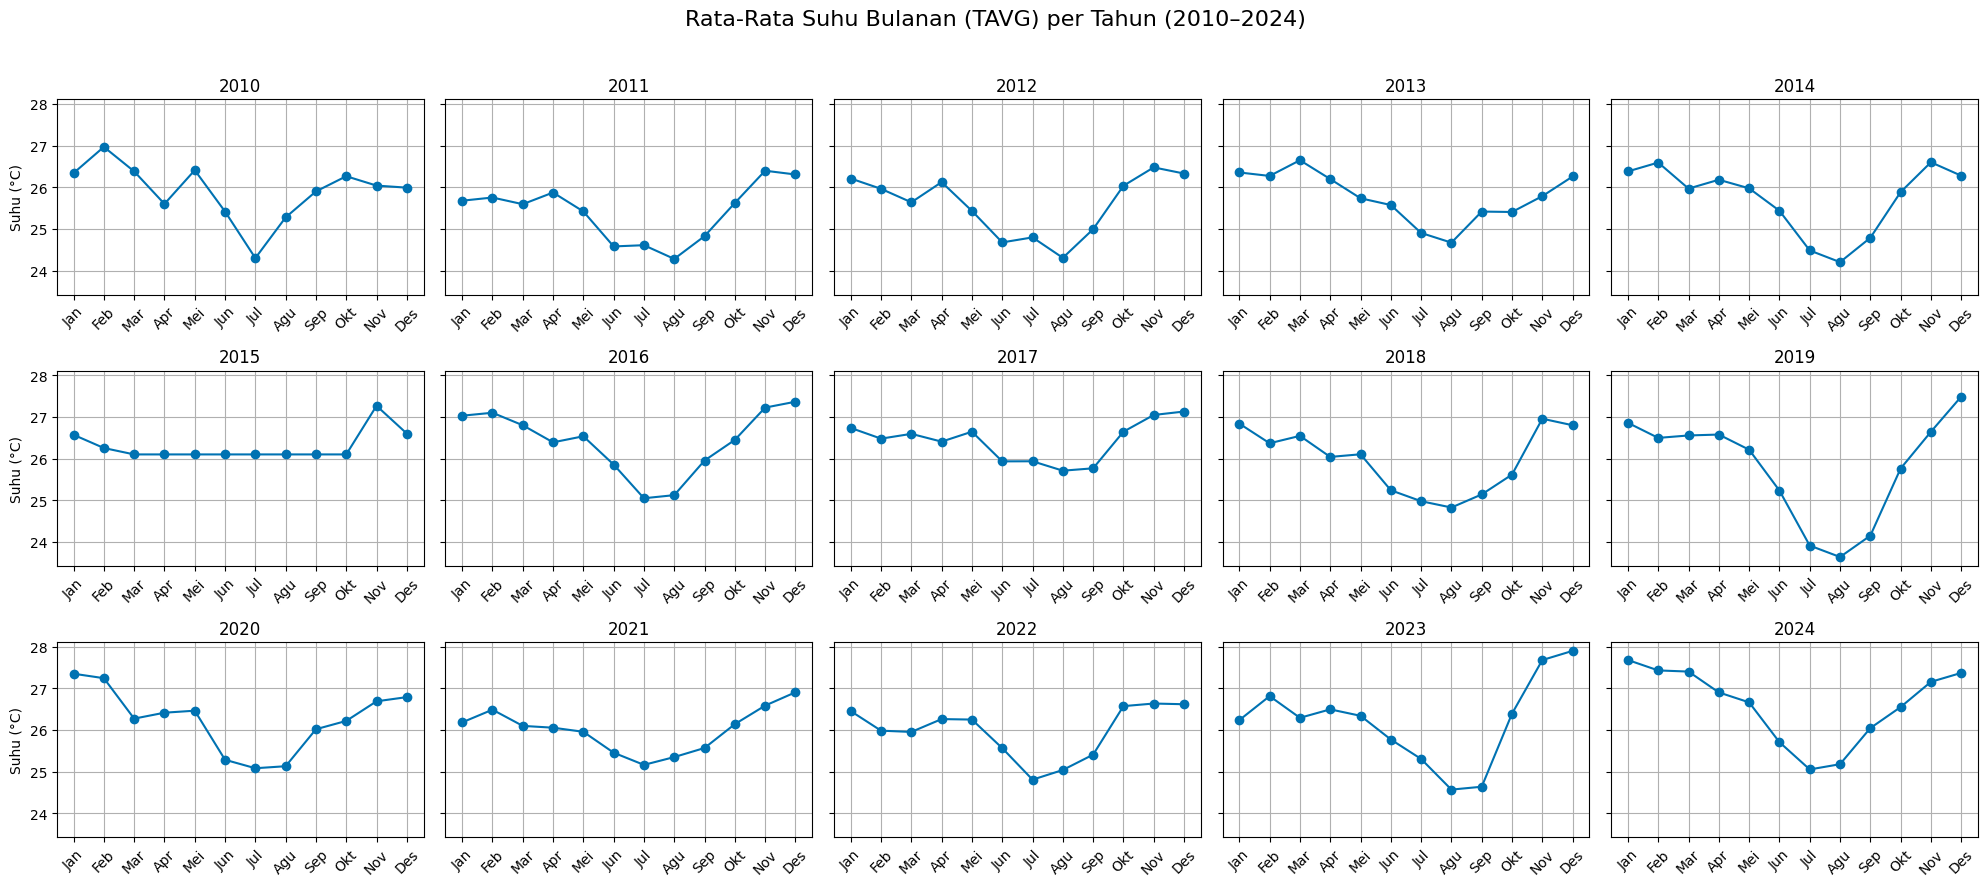

Tabel Rata-Rata Suhu Maksimum (TX) per Bulan dan Tahun:


TAHUN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
BULAN,,,,,,,,,,,,,,,
1,30.786667,30.187097,30.954839,30.619355,30.851613,30.967742,31.270968,30.845161,31.493548,31.116129,31.980645,30.435484,30.580645,31.048387,32.264516
2,31.557143,30.335714,30.882759,30.592857,31.010714,30.035714,31.000000,30.460714,30.750000,30.571429,31.972414,30.742857,29.703571,31.421429,32.355172
3,30.870968,30.561290,30.290323,31.180645,29.870968,29.200000,30.287097,31.232258,30.332258,31.012903,30.425806,30.129032,30.132258,30.509677,32.216129
4,29.800000,30.060000,30.526667,30.273333,30.106667,29.200000,32.106667,29.910000,29.500000,30.300000,30.120000,29.770000,30.173333,30.353333,31.323333
5,30.167742,29.561290,29.664516,29.658065,29.716129,29.200000,29.803226,29.683871,29.541935,29.561290,29.867742,29.316129,30.270968,29.687097,30.406452
6,29.013333,27.823333,28.006667,29.613333,28.666667,29.200000,29.046667,29.063333,28.443333,27.860000,28.740000,28.943333,29.393333,28.956667,29.340000
7,26.000000,28.012903,27.948387,28.496774,27.464516,29.200000,27.893548,29.070968,28.077419,26.487097,28.025806,28.567742,28.022581,28.893548,28.803226
8,28.890323,28.225806,27.258065,27.945161,27.038710,29.200000,27.761290,29.396774,27.987097,28.996774,28.177419,28.800000,28.338710,27.877419,28.983871
9,29.800000,28.393333,28.093333,28.293333,28.050000,29.200000,28.986667,28.553333,28.413333,26.926667,28.926667,29.046667,29.240000,27.853333,30.320000


In [29]:
#  Plot semua tahun sebagai subplot
tahun_list = monthly_tavg_by_year.index.tolist()
n_tahun = len(tahun_list)
n_cols = 5
n_rows = -(-n_tahun // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=True)

for i, tahun in enumerate(tahun_list):
    r, c = divmod(i, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.plot(range(1, 13), monthly_tavg_by_year.loc[tahun], marker='o', color="#0072B2")
    ax.set_title(str(tahun))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(bulan_labels, rotation=45)
    ax.grid(True)
    if c == 0:
        ax.set_ylabel("Suhu (°C)")

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

fig.suptitle("Rata-Rata Suhu Bulanan (TAVG) per Tahun (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Simpan hasil ke CSV
os.makedirs("laporan", exist_ok=True)
monthly_tavg_by_year.T.to_csv("laporan/tavg_per_bulan_per_tahun_2010_2024.csv", index_label="TAHUN")

#  Tampilkan sebagai tabel
print("Tabel Rata-Rata Suhu Maksimum (TX) per Bulan dan Tahun:")
display(monthly_tx_by_year.T)



analisis rata rata curah hujan Bulanan periode 2014-2024

In [30]:
#  Persiapkan data
df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
df["RR"] = pd.to_numeric(df["RR"], errors="coerce")
df_filtered = df[(df["TANGGAL"].dt.year >= 2010) & (df["TANGGAL"].dt.year <= 2024)].copy()
df_filtered["TAHUN"] = df_filtered["TANGGAL"].dt.year
df_filtered["BULAN"] = df_filtered["TANGGAL"].dt.month

In [31]:
#  Group rata-rata RR per bulan dan tahun
monthly_rr_by_year = df_filtered.groupby(["TAHUN", "BULAN"])["RR"].mean().unstack(level=1)

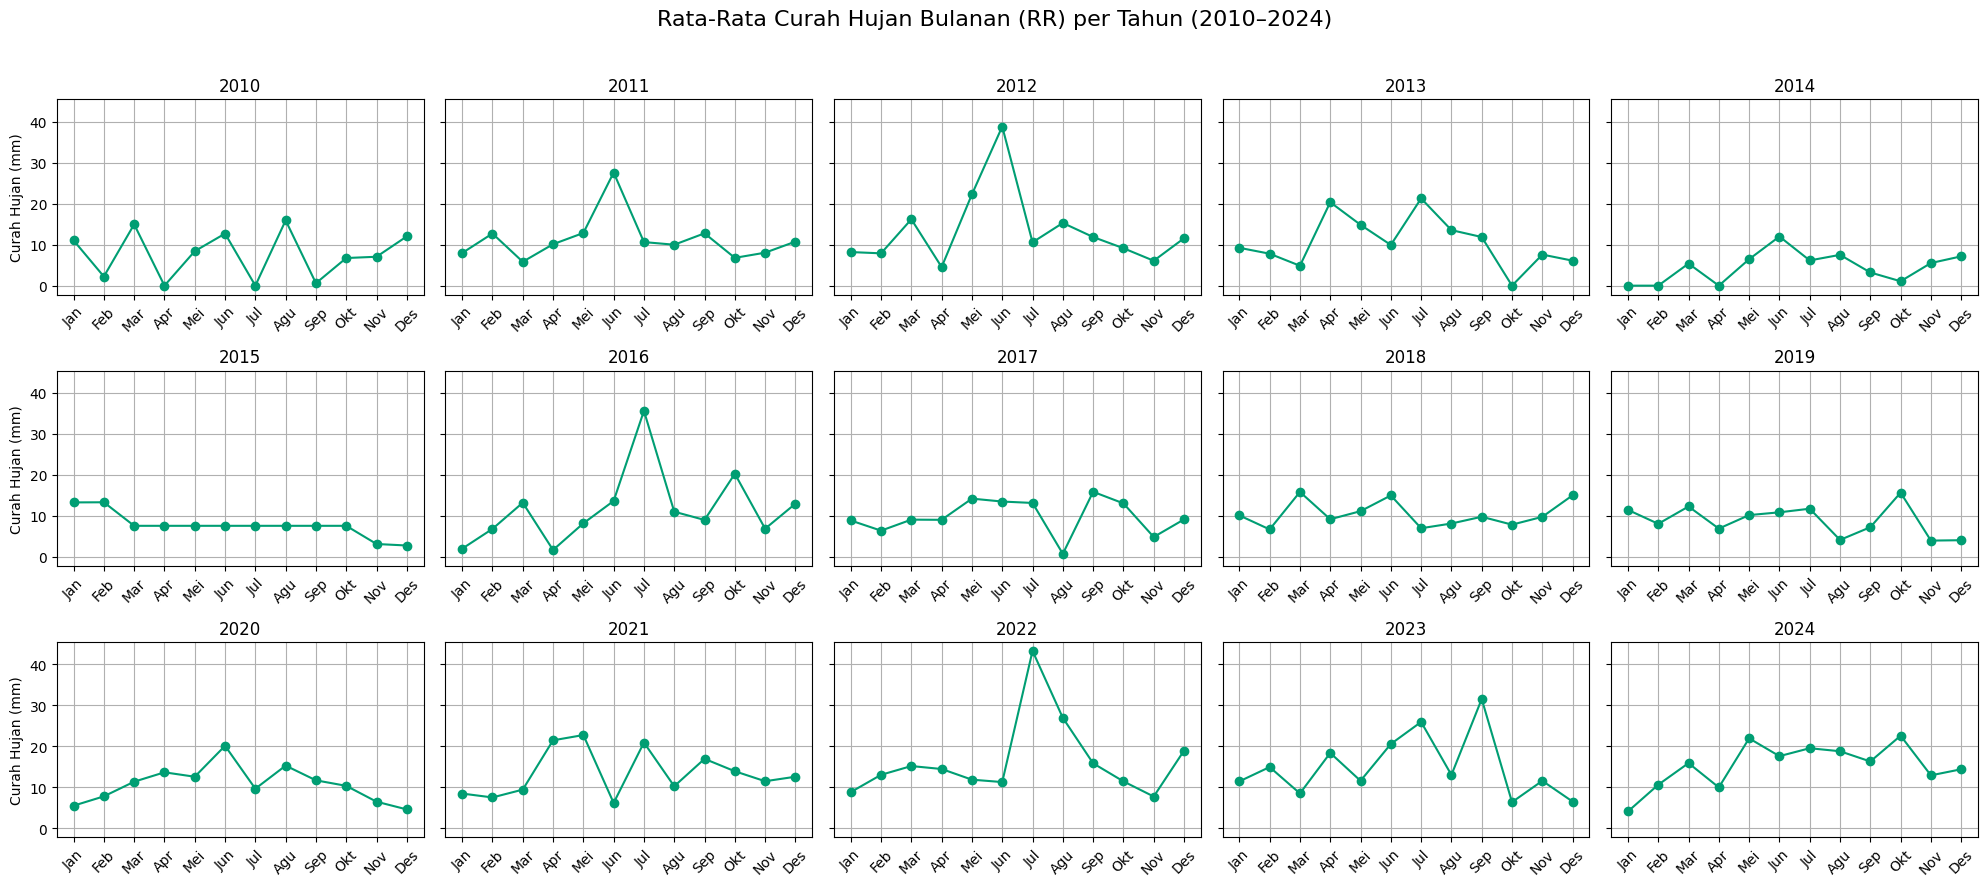

Tabel Rata-Rata Curah Hujan (RR) per Bulan dan Tahun:


TAHUN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
BULAN,,,,,,,,,,,,,,,
1,11.036667,7.954839,8.190323,9.225806,0.000000,13.306452,2.019355,8.903226,10.138710,11.483871,5.516129,8.474194,8.825806,11.445161,4.109677
2,2.228571,12.707143,7.879310,7.789286,0.000000,13.339286,6.848276,6.421429,6.721429,8.085714,7.793103,7.528571,13.042857,14.935714,10.624138
3,14.945161,5.819355,16.183871,4.851613,5.380645,7.600000,13.235484,9.106452,15.861290,12.309677,11.370968,9.435484,15.180645,8.506452,15.896774
4,0.000000,10.103333,4.530000,20.336667,0.000000,7.600000,1.713333,9.063333,9.203333,6.923333,13.653333,21.453333,14.460000,18.380000,9.976667
5,8.406452,12.841935,22.258065,14.832258,6.448387,7.600000,8.209677,14.229032,11.170968,10.212903,12.577419,22.738710,11.861290,11.583871,21.932258
6,12.690000,27.570000,38.786667,9.923333,11.980000,7.600000,13.660000,13.516667,15.003333,10.890000,20.113333,6.186667,11.276667,20.556667,17.593333
7,0.000000,10.622581,10.567742,21.264516,6.151613,7.600000,35.629032,13.174194,7.009677,11.770968,9.654839,20.912903,43.258065,25.932258,19.525806
8,15.906452,9.980645,15.280645,13.538710,7.509677,7.600000,11.038710,0.770968,8.161290,4.161290,15.283871,10.258065,26.929032,13.006452,18.790323
9,0.600000,12.760000,11.856667,11.856667,3.216667,7.600000,9.030000,15.893333,9.806667,7.260000,11.700000,16.936667,15.846667,31.520000,16.296667


In [32]:
#  Plot semua tahun sebagai subplot
tahun_list = monthly_rr_by_year.index.tolist()
n_tahun = len(tahun_list)
n_cols = 5
n_rows = -(-n_tahun // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=True)

for i, tahun in enumerate(tahun_list):
    r, c = divmod(i, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.plot(range(1, 13), monthly_rr_by_year.loc[tahun], marker='o', color="#009E73")
    ax.set_title(str(tahun))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(bulan_labels, rotation=45)
    ax.grid(True)
    if c == 0:
        ax.set_ylabel("Curah Hujan (mm)")

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

fig.suptitle("Rata-Rata Curah Hujan Bulanan (RR) per Tahun (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Simpan hasil ke CSV
os.makedirs("laporan", exist_ok=True)
monthly_rr_by_year.T.to_csv("laporan/rr_per_bulan_per_tahun_2010_2024.csv", index_label="TAHUN")

#  Tampilkan sebagai tabel
print("Tabel Rata-Rata Curah Hujan (RR) per Bulan dan Tahun:")
display(monthly_rr_by_year.T)


Kelembapan rata rata Bulanan periode 2014-2024

In [33]:
#  Persiapkan data
df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
df["RH_AVG"] = pd.to_numeric(df["RH_AVG"], errors="coerce")
df_filtered = df[(df["TANGGAL"].dt.year >= 2010) & (df["TANGGAL"].dt.year <= 2024)].copy()
df_filtered["TAHUN"] = df_filtered["TANGGAL"].dt.year
df_filtered["BULAN"] = df_filtered["TANGGAL"].dt.month

In [34]:
#  Group rata-rata RH_AVG per bulan dan tahun
monthly_RH_AVG_by_year = df_filtered.groupby(["TAHUN", "BULAN"])["RH_AVG"].mean().unstack(level=1)

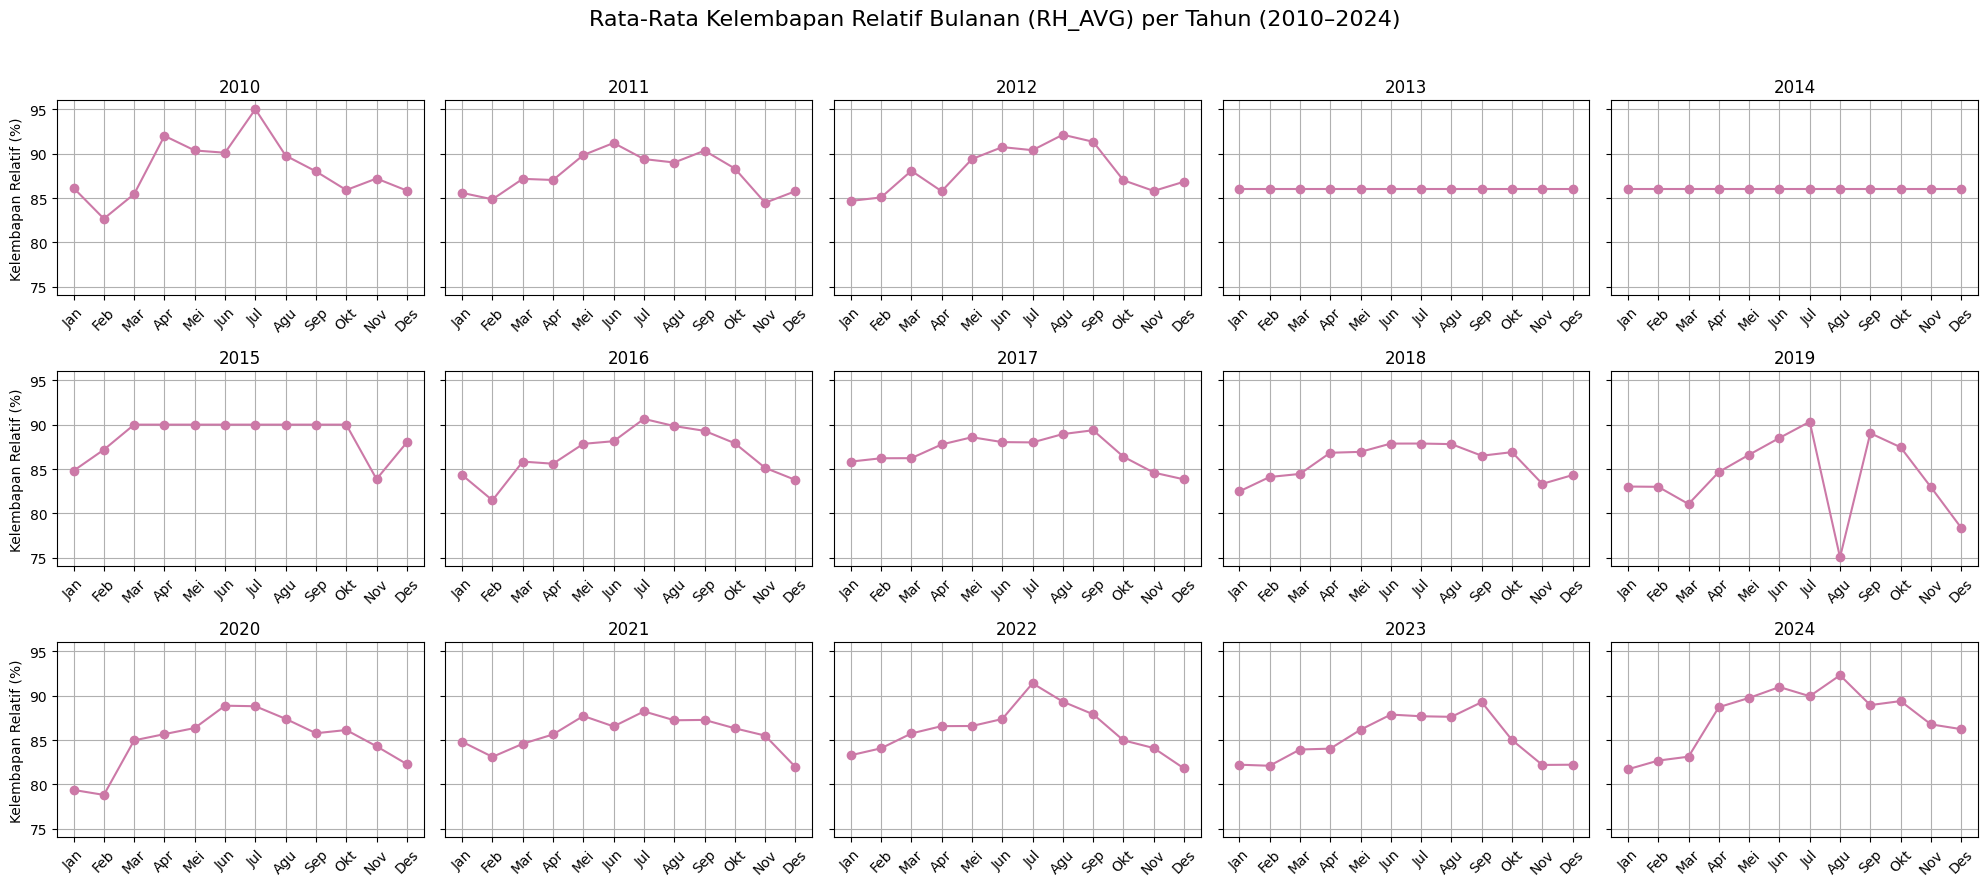

Tabel Rata-Rata Kelembapan Relatif (RH) per Bulan dan Tahun:


TAHUN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
BULAN,,,,,,,,,,,,,,,
1,86.133333,85.580645,84.677419,86.0,86.0,84.806452,84.322581,85.838710,82.483871,83.032258,79.387097,84.806452,83.290323,82.225806,81.709677
2,82.678571,84.857143,85.068966,86.0,86.0,87.178571,81.482759,86.214286,84.107143,83.000000,78.827586,83.107143,84.071429,82.107143,82.689655
3,85.451613,87.161290,88.064516,86.0,86.0,90.000000,85.838710,86.225806,84.451613,81.064516,84.967742,84.580645,85.741935,83.935484,83.129032
4,92.000000,87.033333,85.766667,86.0,86.0,90.000000,85.600000,87.766667,86.833333,84.666667,85.666667,85.633333,86.566667,84.033333,88.700000
5,90.354839,89.838710,89.387097,86.0,86.0,90.000000,87.838710,88.580645,86.935484,86.612903,86.354839,87.709677,86.580645,86.161290,89.741935
6,90.100000,91.200000,90.733333,86.0,86.0,90.000000,88.133333,88.033333,87.866667,88.500000,88.866667,86.533333,87.366667,87.866667,90.966667
7,95.000000,89.387097,90.387097,86.0,86.0,90.000000,90.645161,88.000000,87.870968,90.322581,88.806452,88.225806,91.387097,87.677419,89.935484
8,89.774194,89.000000,92.129032,86.0,86.0,90.000000,89.838710,88.935484,87.806452,75.064516,87.387097,87.225806,89.322581,87.612903,92.290323
9,88.000000,90.333333,91.333333,86.0,86.0,90.000000,89.300000,89.366667,86.500000,89.033333,85.766667,87.266667,87.900000,89.266667,88.933333


In [35]:
#  Plot semua tahun sebagai subplot
tahun_list = monthly_RH_AVG_by_year.index.tolist()
n_tahun = len(tahun_list)
n_cols = 5
n_rows = -(-n_tahun // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=True)

for i, tahun in enumerate(tahun_list):
    r, c = divmod(i, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.plot(range(1, 13), monthly_RH_AVG_by_year.loc[tahun], marker='o', color="#CC79A7")
    ax.set_title(str(tahun))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(bulan_labels, rotation=45)
    ax.grid(True)
    if c == 0:
        ax.set_ylabel("Kelembapan Relatif (%)")

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

fig.suptitle("Rata-Rata Kelembapan Relatif Bulanan (RH_AVG) per Tahun (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Simpan hasil ke CSV
os.makedirs("laporan", exist_ok=True)
monthly_RH_AVG_by_year.T.to_csv("laporan/RH_AVG_per_bulan_per_tahun_2010_2024.csv", index_label="TAHUN")

#  Tampilkan sebagai tabel
print("Tabel Rata-Rata Kelembapan Relatif (RH) per Bulan dan Tahun:")
display(monthly_RH_AVG_by_year.T)



Kelembapan kecepatan angin rata rata Bulanan periode 2014-2024

In [36]:
#  Persiapkan data
df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
df["FF_X"] = pd.to_numeric(df["FF_X"], errors="coerce")
df_filtered = df[(df["TANGGAL"].dt.year >= 2010) & (df["TANGGAL"].dt.year <= 2024)].copy()
df_filtered["TAHUN"] = df_filtered["TANGGAL"].dt.year
df_filtered["BULAN"] = df_filtered["TANGGAL"].dt.month

In [37]:
#  Group rata-rata FF_X per bulan dan tahun
monthly_FF_X_by_year = df_filtered.groupby(["TAHUN", "BULAN"])["FF_X"].mean().unstack(level=1)

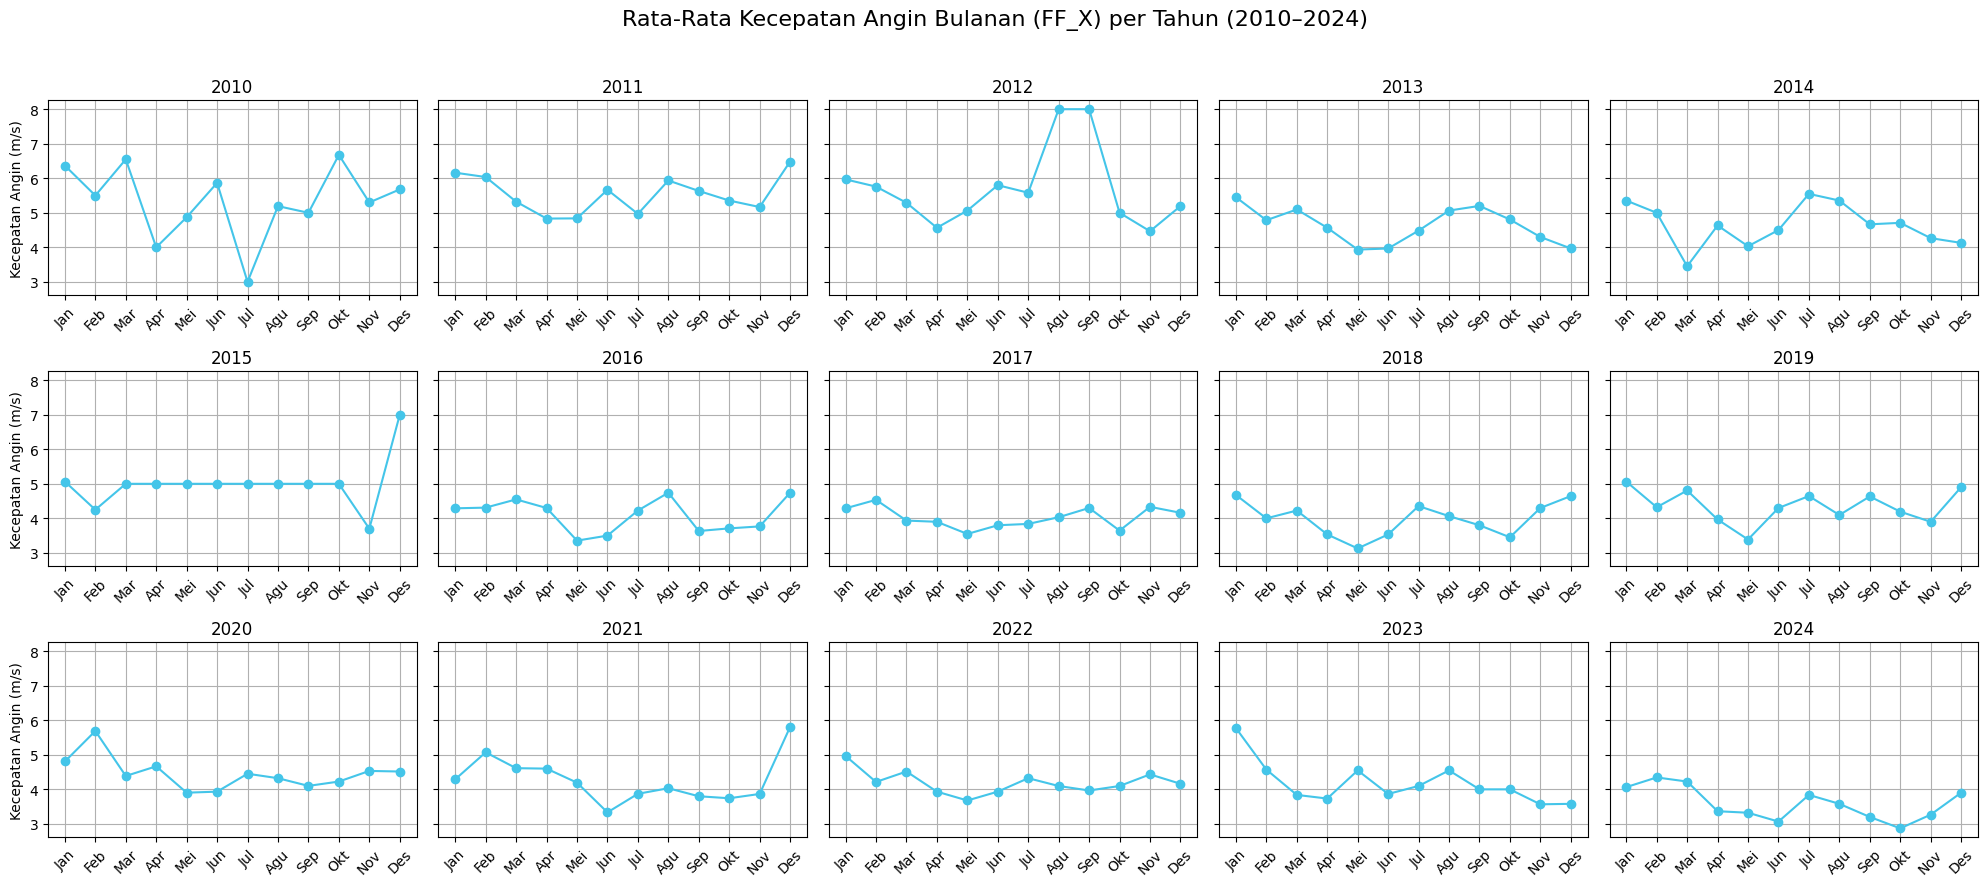

Tabel Rata-Rata Kecepatan Angin (FF) per Bulan dan Tahun:


TAHUN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
BULAN,,,,,,,,,,,,,,,
1,6.366667,6.161290,5.967742,5.451613,5.354839,5.064516,4.290323,4.290323,4.677419,5.064516,4.806452,4.290323,4.967742,5.774194,4.064516
2,5.500000,6.035714,5.758621,4.785714,5.000000,4.250000,4.310345,4.535714,4.000000,4.321429,5.689655,5.071429,4.214286,4.571429,4.344828
3,6.548387,5.322581,5.290323,5.096774,3.451613,5.000000,4.548387,3.935484,4.225806,4.806452,4.387097,4.612903,4.516129,3.838710,4.225806
4,4.000000,4.833333,4.566667,4.566667,4.633333,5.000000,4.300000,3.900000,3.533333,3.966667,4.666667,4.600000,3.933333,3.733333,3.366667
5,4.870968,4.838710,5.064516,3.935484,4.032258,5.000000,3.354839,3.548387,3.129032,3.387097,3.903226,4.193548,3.677419,4.548387,3.322581
6,5.866667,5.666667,5.800000,3.966667,4.500000,5.000000,3.500000,3.800000,3.533333,4.300000,3.933333,3.333333,3.933333,3.866667,3.066667
7,3.000000,4.967742,5.580645,4.483871,5.548387,5.000000,4.225806,3.838710,4.354839,4.645161,4.451613,3.870968,4.322581,4.096774,3.838710
8,5.193548,5.935484,8.000000,5.064516,5.354839,5.000000,4.741935,4.032258,4.064516,4.096774,4.322581,4.032258,4.096774,4.548387,3.580645
9,5.000000,5.633333,8.000000,5.200000,4.666667,5.000000,3.633333,4.300000,3.800000,4.633333,4.100000,3.800000,3.966667,4.000000,3.200000


In [38]:
#  Plot semua tahun sebagai subplot
tahun_list = monthly_FF_X_by_year.index.tolist()
n_tahun = len(tahun_list)
n_cols = 5
n_rows = -(-n_tahun // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), sharey=True)

for i, tahun in enumerate(tahun_list):
    r, c = divmod(i, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.plot(range(1, 13), monthly_FF_X_by_year.loc[tahun], marker='o', color="#44C5E9")
    ax.set_title(str(tahun))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(bulan_labels, rotation=45)
    ax.grid(True)
    if c == 0:
        ax.set_ylabel("Kecepatan Angin (m/s)")

# Hapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c] if n_rows > 1 else axes[c])

fig.suptitle("Rata-Rata Kecepatan Angin Bulanan (FF_X) per Tahun (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#  Simpan hasil ke CSV
os.makedirs("laporan", exist_ok=True)
monthly_FF_X_by_year.T.to_csv("laporan/FF_X_per_bulan_per_tahun_2010_2024.csv", index_label="TAHUN")

#  Tampilkan sebagai tabel
print("Tabel Rata-Rata Kecepatan Angin (FF) per Bulan dan Tahun:")
display(monthly_FF_X_by_year.T)
